#### Obravnava problema nihanja s 2 PS ($x_1(t)$ in $x_2(t)$) ob vzbujanju $y(t)$ in uporabo konvolucijskega integrala

In [32]:
#! pip install ipynb --upgrade

In [33]:
#import numpy and matplotlib
import numpy as np;
import matplotlib.pyplot as plt;
import funkcije_seminar as f;

#use plot style seaborn
plt.style.use('seaborn');
colors = np.array(['#390099', '#9e0059', '#ff0054', '#ff5400', '#ffbd00', '#80ff72', '#00d084', '#00a3af']);


C:\Users\marko\AppData\Local\Temp\ipykernel_19008\1993208459.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


<img src="shema.jpg" width="400">

##### Neodvisna spremenljivka $t$ in podatki - lastnosti sistema

In [34]:
t = f.neodvisna_spremenljivka_t(40);

In [35]:
m1 = 40;
k1 = 500;

m2 = 350;
k2 = 700;

#create matrices M and K of zeroes and add values
M = f.mass_matrix(m1, m2);
K = f.stiffness_matrix(k1, k2);

#print matrices M and K
print('M = ')
print(M)
print('K = ')
print(K)
#create file results.txt
# def clear_res("a"):
#     with open('a', 'w') as fp:
#         fp.write('')
# clear_res('result.txt')

# with open('result.txt', 'a') as fp:
#     fp.write(f'\n')
#     fp.write('m1, m2, k1, k2 = ')
#     fp.write(str(m1), str(m2), str(k1), str(k2))
#     fp.write('M = ')
#     fp.write(str(M))
#     fp.write(f'\n\n')
#     fp.write('K = ')
#     fp.write(str(K))

M = 
[[ 40.   0.]
 [  0. 350.]]
K = 
[[1200. -700.]
 [-700.  700.]]


#### Lastne vrednosti, lastni vektorji

In [36]:
A = np.linalg.inv(M) @ K

#eigenvalues and eigenvectors
eigenval, eigenvec = np.linalg.eig(A)
eigenvalues, eigenvectors = f.eig(eigenval, eigenvec)


eigenvalues
[0.89516247 5.58557823]
 
eigenvectors
[[ 0.51408075  0.99766236]
 [ 0.85774179 -0.06833612]]


In [37]:
print(f'{eigenvalues[0]:.3f} rad/s \t=>\t {eigenvectors[:,0]}')
print(f'{eigenvalues[1]:.3f} rad/s \t=>\t {eigenvectors[:,1]}')

0.895 rad/s 	=>	 [0.51408075 0.85774179]
5.586 rad/s 	=>	 [ 0.99766236 -0.06833612]


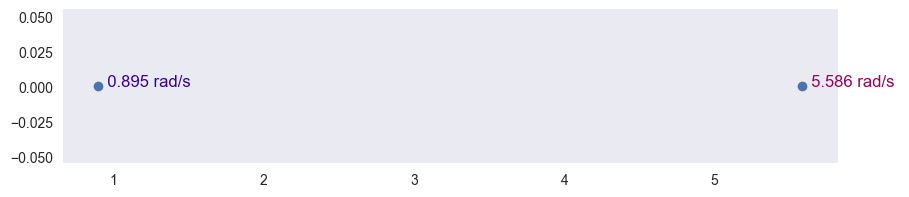

omega1 	 = 0.895 rad/s
omega2 	 = 5.586 rad/s


In [38]:
plt.figure(figsize=(10,2))
plt.grid()
plt.plot(eigenvalues.real, eigenvalues.imag, 'o')
for i in range(len(eigenvalues)):
    plt.text(eigenvalues[i].real, eigenvalues[i].imag, f'  {eigenvalues[i]:.3f} rad/s ', fontsize=12, color=colors[i])
#plt.axhline(0, color='k', lw=1, alpha=0.2)
plt.show()

omega1 = eigenvalues[0]
omega2 = eigenvalues[1]

print(f'omega1 \t = {omega1:.3f} rad/s')
print(f'omega2 \t = {omega2:.3f} rad/s')

C:\Users\marko\AppData\Local\Temp\ipykernel_19008\3423461170.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


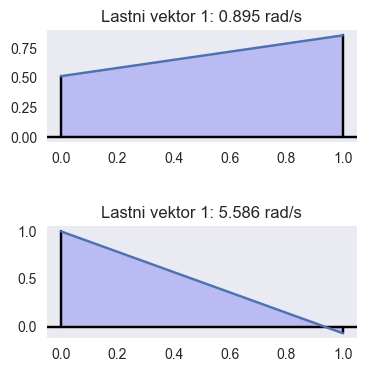

In [39]:
plt.figure(figsize=(4,4))
plt.title("Lastni vektorji")

plt.subplot(2,1,1)
plt.title(f'Lastni vektor 1: {eigenvalues[0]:.3f} rad/s')
plt.fill_between(np.arange(0,2), eigenvectors[:,0], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,0]], 'black')
plt.plot([1,1], [0, eigenvectors[1,0]], 'black')
plt.axhline(0, color='black')
plt.axhline(y=0, color='k', lw=0.2)
plt.grid()
plt.plot(eigenvectors[:,0])
# add horizontal space
plt.subplots_adjust(hspace=0.75)
plt.subplot(2,1,2)
plt.title(f'Lastni vektor 1: {eigenvalues[1]:.3f} rad/s')
plt.fill_between(np.arange(0,2), eigenvectors[:,1], color='blue', alpha=0.2)
plt.plot([0,0], [0, eigenvectors[0,1]], 'black')
plt.plot([1,1], [0, eigenvectors[1,1]], 'black')
# plt.ylim(0.95, 1.1)
plt.axhline(y=0, color='k')
plt.grid()
plt.plot(eigenvectors[:,1])


In [40]:
modal_mass_m, modal_stiffness_m = f.modal_mass_stiffness(eigenvectors, M, K)
print('modal_mass_m = ')
print(modal_mass_m)
print("  ")
print('modal_stiffness_m = ')
print(modal_stiffness_m)

modal_mass_m = 
[[268.07350522   0.        ]
 [  0.          41.44764574]]
  
modal_stiffness_m = 
[[ 214.81154774    0.        ]
 [   0.         1293.1120082 ]]


### Preverjanje $\omega_1$ in $\omega_2$

In [41]:
omega11 = np.sqrt(modal_stiffness_m[0,0]/modal_mass_m[0,0])
omega22 = np.sqrt(modal_stiffness_m[1,1]/modal_mass_m[1,1])

print(f'modal stiffness 1 \t = \t{modal_stiffness_m[0,0]:.3f} N/m')
print(f'modal mass 1 \t\t = \t{modal_mass_m[0,0]:.2f} kg')
print(f'omega1 \t\t\t = \t{omega11:.2f} rad/s')
print(" ")
print(f'modal stiffness 2 \t = \t{modal_stiffness_m[1,1]:.3f}')
print(f'modal mass 2 \t\t = \t{modal_mass_m[1,1]:.2f}')
print(f'omega2 \t\t\t = \t{omega22:.2f} rad/s')

modal stiffness 1 	 = 	214.812 N/m
modal mass 1 		 = 	268.07 kg
omega1 			 = 	0.90 rad/s
 
modal stiffness 2 	 = 	1293.112
modal mass 2 		 = 	41.45
omega2 			 = 	5.59 rad/s


In [42]:
print(f'omega1 \t = {omega1:.3f} rad/s   \t\t omega11 \t = {omega11:.3f} rad/s')
print(f'omega2 \t = {omega2:.3f} rad/s \t\t omega22 \t = {omega22:.3f} rad/s')

omega1 	 = 0.895 rad/s   		 omega11 	 = 0.895 rad/s
omega2 	 = 5.586 rad/s 		 omega22 	 = 5.586 rad/s


### Definicija dušenja in $\omega_D$

In [43]:
d_krit1 = np.sqrt(k1/m1)
d_krit2 = np.sqrt(k2/m2)
delta1 = 0.15;
delta2 = 0.05;
print(f'delta1 = {delta1:.2f} \t delta1_krit = {d_krit1:.2f}')
print(f'delta2 = {delta2:.2f} \t delta2_krit = {d_krit2:.2f}')

delta1 = 0.15 	 delta1_krit = 3.54
delta2 = 0.05 	 delta2_krit = 1.41


In [44]:
omega1D = omega1 * np.sqrt(1 - delta1**2)
omega2D = omega2 * np.sqrt(1 - delta2**2)
print(f'omega1 = {omega1:.2f} rad/s')
print(f'omega1D = {omega1D:.2f} rad/s')
print(f'omega2 = {omega2:.2f} rad/s')
print(f'omega2D = {omega2D:.2f} rad/s')

omega1 = 0.90 rad/s
omega1D = 0.89 rad/s
omega2 = 5.59 rad/s
omega2D = 5.58 rad/s


## Definicija vzbujanja

(-0.3, 0.3)

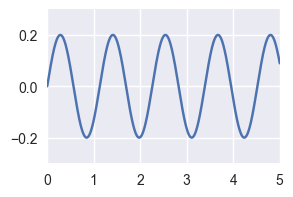

In [45]:
ff = omega1D;
o = 500;
y = 0.2 * np.sin(2 * np.pi * ff * t)
plt.figure(figsize=(3,2))
plt.plot(t, y)
plt.xlim(0, 5)
plt.ylim(-0.3, 0.3)

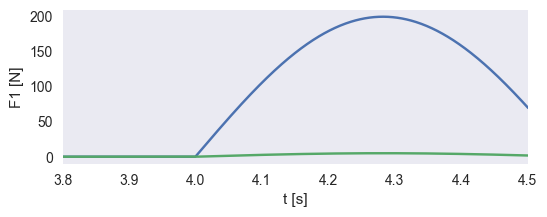

In [46]:
F = np.zeros_like(t)
F0 = 1000; #N
t0 = 4

F2 = np.zeros_like(t);
F2[4000:int(4000 + o/ff)] = y[:int(o/ff)] * F0

plt.figure(figsize=(6,2))
#range axis
plt.xlim(3.8, 4.5)
#axis labels
plt.xlabel('t [s]')
plt.ylabel('F1 [N]')
plt.plot(t, F2, label='Vzbujevalja sila')
plt.plot(t, F2/m1, label='pospešek mase 1')
plt.grid()

In [47]:
Ft = np.zeros((2, len(t)))
Ft[0,:] = F2

Pri prehodu v modalne koordinate:
$$leva \ stran = [\Phi]^T \cdot \{ F(t)\}

In [48]:
Modal_Ft = eigenvectors.T @ Ft

## Konvolucija 1

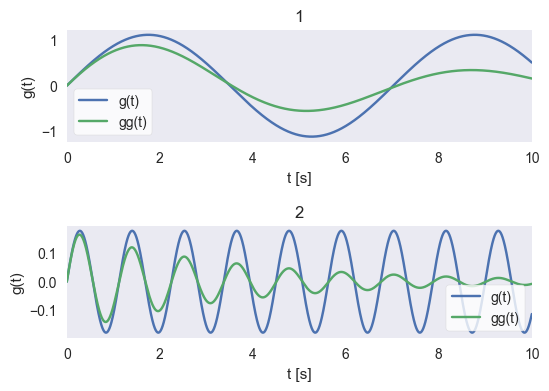

In [49]:
g_func1 = 1/omega1 * np.sin(omega1 * t)
g_func2 = 1/omega2 * np.sin(omega2 * t)

gg_func1 = 1/omega1 * np.exp(-delta1 * omega1 * t) * np.sin(omega1D * t)
gg_func2 = 1/omega2 * np.exp(-delta2 * omega2 * t) * np.sin(omega2D * t)

plot1 = plt.figure(figsize=(6,4))
plt.subplot(2,1,1)
plt.title("1")
plt.xlim(0, 10)
plt.xlabel('t [s]')
plt.ylabel('g(t)')
plt.plot(t, g_func1)
plt.plot(t, gg_func1) 
plt.grid()
plt.legend(['g(t)', 'gg(t)'], frameon=True, facecolor='white')
plt.subplot(2,1,2)
#add empty space between subplots
plt.subplots_adjust(hspace=0.75)
plt.title("2")
plt.xlim(0, 10)
plt.xlabel('t [s]')
plt.ylabel('g(t)')
plt.plot(t, g_func2)
plt.plot(t, gg_func2)
plt.grid()
plt.legend(['g(t)', 'gg(t)'], frameon=True, facecolor='white')

### Izračun $\xi_1$ in $\xi_2$ in začetni pogoji

In [50]:
#eta1
eta1 = np.convolve(Modal_Ft[0,:], g_func1) * (t[1] - t[0])
eta1d = np.convolve(Modal_Ft[0,:], gg_func1) * (t[1] - t[0])

#eta2
eta2 = np.convolve(Modal_Ft[1,:], g_func2) * (t[1] - t[0])
eta2d = np.convolve(Modal_Ft[1,:], gg_func2) * (t[1] - t[0])

print(f'size of eta2: {eta2.size}')
print(" ")
print(eta1d[100:110])
print(eta2d[100:110])

size of eta2: 80001
 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [51]:
#create vector eta with two rows and add eta1 to the first row and eta2 to the second row
eta = np.zeros((2, 2*len(t) - 1))
eta[0,:] = eta1
eta[1,:] = eta2

etaD = np.zeros((2, 2*len(t) - 1))
etaD[0,:] = eta1d
etaD[1,:] = eta2d

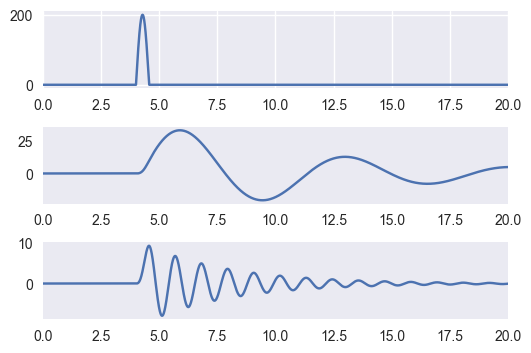

In [52]:
#plot eta1, eta2 
plt.figure(figsize=(6,4))

#range axis
plt.subplot(3,1,1)
plt.plot(t, Ft[0])
plt.xlim(0, 20)

plt.subplot(3,1,2)
plt.xlim(0, 20)
# plt.plot(t, eta1[:len(t)])
plt.plot(t, eta1d[:len(t)])
plt.grid()
plt.subplots_adjust(hspace=0.5)

plt.subplot(3,1,3)
plt.xlim(0, 20)
# plt.plot(t, eta2[:len(t)])
plt.plot(t, eta2d[:len(t)])
plt.grid()

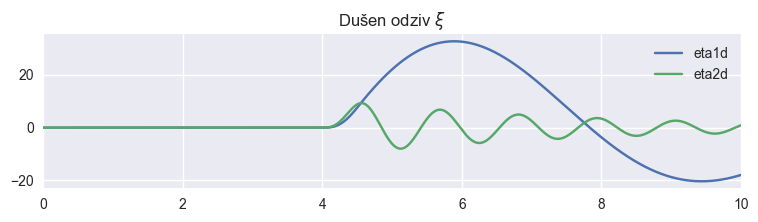

In [53]:
plt.figure(figsize=(9,2))
plt.title(r'Dušen odziv $\xi$')
plt.xlim(0, 10)
plt.plot(t, eta1d[:len(t)], label='eta1d')
plt.plot(t, eta2d[:len(t)], label='eta2d')
plt.legend()

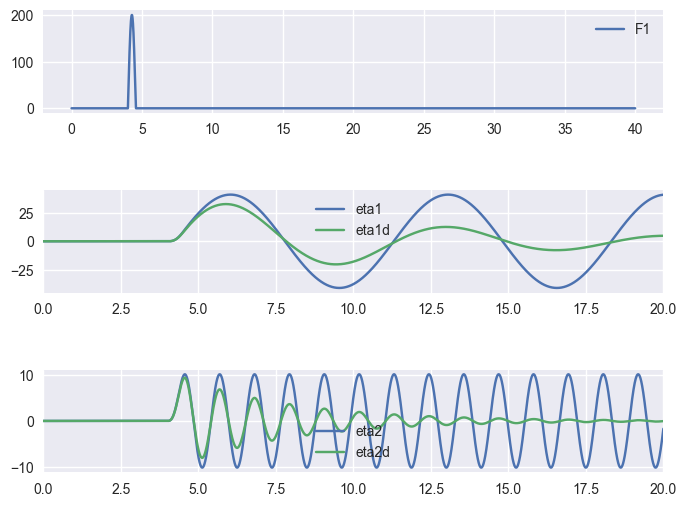

In [54]:
#plot eta1, eta2 
plt.figure(figsize=(8,6))

#range axis
plt.subplot(3,1,1)
plt.plot(t, Ft[0], label='F1')
plt.legend()
plt.subplots_adjust(hspace=0.75)

plt.subplot(3,1,2)
plt.xlim(0, 20)
plt.plot(t, eta1[:len(t)], label='eta1')
plt.plot(t, eta1d[:len(t)], label='eta1d')
plt.legend()
plt.subplots_adjust(hspace=0.75)

plt.subplot(3,1,3)
plt.xlim(0, 20)
plt.plot(t, eta2[:len(t)] ,label='eta2')
plt.plot(t, eta2d[:len(t)], label='eta2d')
plt.legend()

### Iz modalnega prostora nazaj v realnega

$$\{x(t)\}=[\Phi] \cdot \{\xi(t)\}$$

In [55]:
print(eigenvectors)
print("  ")
print(eta[:,50:60])
print("  ")
print(etaD[:,50:60])

[[ 0.51408075  0.99766236]
 [ 0.85774179 -0.06833612]]
  
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
  
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [56]:
# plt.figure(figsize=(6,10))
# plt.subplot(3,1,1)
# plt.plot(t, etaD[0,:len(t)], label='etaD1')
# plt.plot(t, etaD[1,:len(t)], color=colors[6], linestyle='--', label='etaD2')
# plt.legend()
# x1D = eigenvectors[0,0] * etaD[0,:] + eigenvectors[0,1] * etaD[1,:]
# x2D = eigenvectors[1,0] * etaD[0,:] + eigenvectors[1,1] * etaD[1,:]
# plt.subplots_adjust(hspace=0.25)
# plt.subplot(3,1,2)
# plt.plot(t, x1D[:len(t)])
# plt.plot(t, x2D[:len(t)], color=colors[6], linestyle='--', label='etaD2')
# plt.subplots_adjust(hspace=0.25)
# plt.subplot(3,1,3)
# plt.title("Razlika med x2 in x1")
# plt.plot(t, (x1D - x2D)[:len(t)])

# eigenvectors

In [57]:
eigenvectors[:,0] 

array([0.51408075, 0.85774179])

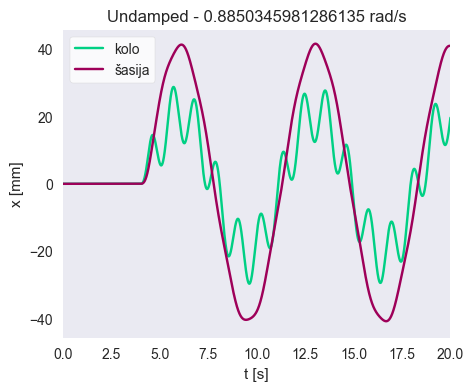

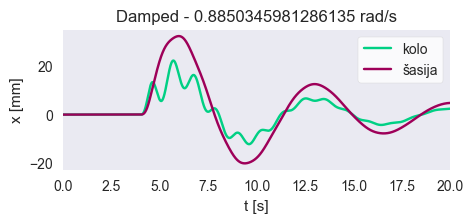

In [58]:
v_pom = 0
x1_1 = eigenvectors[:,0] @ eta
x1_2 = eigenvectors[:,1] @ eta

x1_1D = eigenvectors[:,0] @ etaD
x1_2D = eigenvectors[:,1] @ etaD

#plot x1_1 and x1_2
plt.figure(figsize=(5,4))
plt.title(f'Undamped - {ff} rad/s')
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('x [mm]')
plt.plot(t, x1_1[:len(t)], color = colors[6])
plt.plot(t, v_pom + x1_2[:len(t)], color = colors[1])
plt.grid()
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')
# plt.savefig(f'./x_{ff}rad_s.png', dpi=300)

#plot x1_1D and x1_2D
plt.figure(figsize=(5,4))
plt.subplot(2,1,1)
plt.title(f'Damped - {ff} rad/s')
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('x [mm]')
plt.plot(t, x1_1D[:len(t)], color = colors[6])
plt.plot(t, v_pom + x1_2D[:len(t)], color = colors[1])
plt.grid()
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')
#save figure
# plt.savefig(f'./xD_{ff}rad_s.png', dpi=300)


In [59]:
# #create figure with 2 rows and 2 columns plots
# fig, axs = plt.subplots(2, 2, figsize=(8,4))
# #set title
# fig.suptitle(f'Frekvenca - {ff:.3f} rad/s\nPomiki')
# #limit x
# axs[0, 0].set_xlim(3, 20)
# axs[0, 1].set_xlim(3, 20)
# axs[1, 0].set_xlim(3, 20)
# axs[1, 1].set_xlim(3, 20)
# #set x and y labels
# axs[0, 0].set_xlabel('t [s]')
# axs[0, 0].set_ylabel('x [mm]')
# axs[0, 1].set_xlabel('t [s]')
# axs[0, 1].set_ylabel('x [mm]')
# axs[1, 0].set_xlabel('t [s]')
# axs[1, 0].set_ylabel('x [mm]')
# axs[1, 1].set_xlabel('t [s]')
# axs[1, 1].set_ylabel('x [mm]')
# #plot x1_1 and x1_2
# axs[0, 0].plot(t, x1_1[:len(t)], color = colors[6])
# axs[0, 0].plot(t, v_pom + x1_2[:len(t)], color = colors[1])
# axs[0, 0].grid()
# axs[0, 0].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
# #plot x1_1D and x1_2D
# axs[0, 1].plot(t, x1_1D[:len(t)], color = colors[6])
# axs[0, 1].plot(t, v_pom + x1_2D[:len(t)], color = colors[1])
# axs[0, 1].grid()
# axs[0, 1].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
# #plot x1_1 and x1_2
# axs[1, 0].plot(t, x1_1[:len(t)], color = colors[6])
# axs[1, 0].plot(t, v_pom + x1_2[:len(t)], color = colors[1])
# axs[1, 0].grid()
# axs[1, 0].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
# #plot x1_1D and x1_2D
# axs[1, 1].plot(t, x1_1D[:len(t)], color = colors[6])
# axs[1, 1].plot(t, v_pom + x1_2D[:len(t)], color = colors[1])
# axs[1, 1].grid()
# axs[1, 1].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
# #save figure
# plt.savefig(f'./x4_{ff}rad_s.png', dpi=300)

In [60]:
# create x11 and x12 as second derivatives of x1_1 and x1_2
a11 = np.zeros(len(t))
a12 = np.zeros(len(t))
a11D = np.zeros(len(t))
a12D = np.zeros(len(t))
# create a11 as second derivatives of a1_1
for i in range(1, len(t)-1):
    a11[i] = (x1_1[i+1] - 2*x1_1[i] + x1_1[i-1]) / (t[i+1] - t[i])**2
    a12[i] = (x1_2[i+1] - 2*x1_2[i] + x1_2[i-1]) / (t[i+1] - t[i])**2
    a11D[i] = (x1_1D[i+1] - 2*x1_1D[i] + x1_1D[i-1]) / (t[i+1] - t[i])**2
    a12D[i] = (x1_2D[i+1] - 2*x1_2D[i] + x1_2D[i-1]) / (t[i+1] - t[i])**2


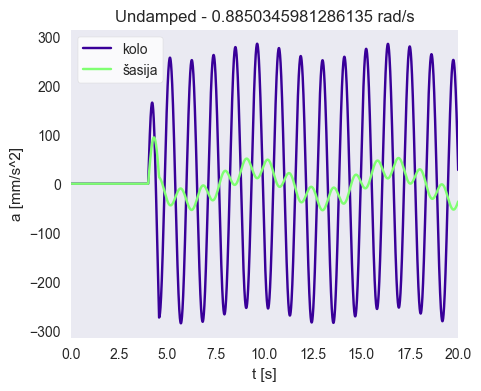

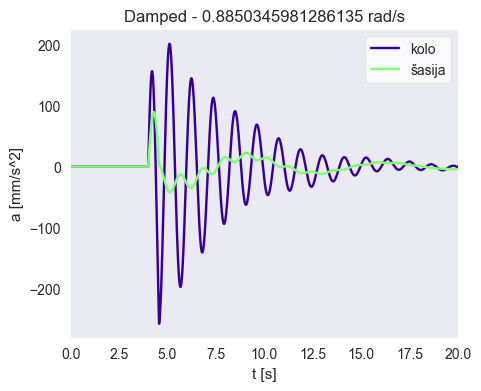

In [61]:
# plot x11 and x12
plt.figure(figsize=(5, 4))
plt.title(f'Undamped - {ff} rad/s')
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('a [mm/s^2]')
plt.plot(t, a11[:len(t)], color=colors[0])
plt.plot(t, a12[:len(t)], color=colors[5])
plt.grid()
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')

# plot x11D and x12D
plt.figure(figsize=(5, 4))
plt.title(f'Damped - {ff} rad/s')
plt.xlim(0, 20)
plt.xlabel('t [s]')
plt.ylabel('a [mm/s^2]')
plt.plot(t, a11D[:len(t)], color=colors[0])
plt.plot(t, a12D[:len(t)], color=colors[5])
plt.grid()
plt.legend(['kolo', 'šasija'], frameon=True, facecolor='white')


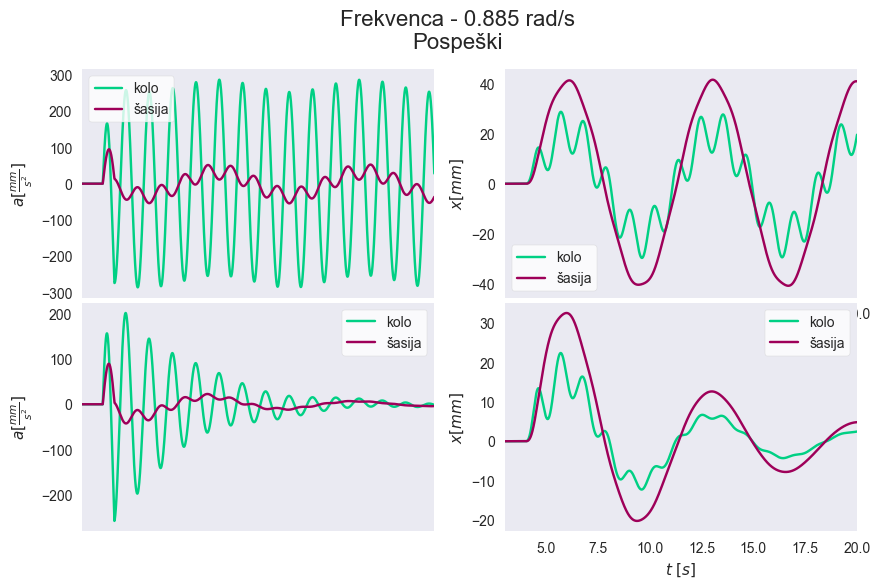

In [62]:
#create figure with 2 rows and 2 columns plots
fig, axs = plt.subplots(2, 2, figsize=(10,6))

# plt.subplots_adjust(bottom=0.5, top=2.9)
#set title
fig.suptitle(f'Frekvenca - {ff:.3f} rad/s\n', fontsize=12)
#limit x
axs[0, 0].set_xlim(3, 20)
axs[1, 0].set_xlim(3, 20)

#set x and y labels
axs[0, 0].set_ylabel(r'$a [\frac{mm}{s^2}]$')
axs[1, 0].set_ylabel(r'$a [\frac{mm}{s^2}]$')
# remove x ticks
axs[0, 0].set_xticks([])
axs[1, 0].set_xticks([])
#plot x1_1 and x1_2
axs[0, 0].plot(t, a11[:len(t)], color = colors[6])
axs[0, 0].plot(t, v_pom + a12[:len(t)], color = colors[1])
axs[0, 0].grid()
axs[0, 0].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
#plot x1_1D and x1_2D
axs[1, 0].plot(t, a11D[:len(t)], color = colors[6])
axs[1, 0].plot(t, v_pom + a12D[:len(t)], color = colors[1])
axs[1, 0].grid()
axs[1, 0].legend(['kolo', 'šasija'], frameon=True, facecolor='white')


#set title
fig.suptitle(f'Frekvenca - {ff:.3f} rad/s\nPospeški', fontsize=16)
#limit x
axs[0, 1].set_xlim(3, 20)
axs[1, 1].set_xlim(3, 20)
#set x and y labels
plt.subplots_adjust(hspace=0.02)
axs[0, 1].set_xlabel(r'$t \ [s]$')
axs[0, 1].set_ylabel(r'$x  [mm]$')
axs[1, 1].set_xlabel(r'$t \ [s]$')
axs[1, 1].set_ylabel(r'$x  [mm]$')
#plot x1_1 and x1_2
axs[0, 1].plot(t, x1_1[:len(t)], color = colors[6])
axs[0, 1].plot(t, v_pom + x1_2[:len(t)], color = colors[1])
axs[0, 1].grid()
axs[0, 1].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
#plot x1_1D and x1_2D
axs[1, 1].plot(t, x1_1D[:len(t)], color = colors[6])
axs[1, 1].plot(t, v_pom + x1_2D[:len(t)], color = colors[1])
axs[1, 1].grid()
axs[1, 1].legend(['kolo', 'šasija'], frameon=True, facecolor='white')
#save figure
plt.savefig(f'./rez_{ff:3f}rad_s.png', dpi=300)